<p align='center'><img alt="Colaboratory logo" width="35%" src="https://laboratoriodebits.com.br/wp-content/uploads/2022/01/ygor-lima-ds-e1642745580848.png">

# **Projeto - Panorama da COVID-19 no Brasil e no Mundo**
por [Ygor Moreira Lima](https://ds.laboratoriodebits.com.br)

<p align='center'>
  <u>Links</u><br>
<a href="https://github.com/ygordev"><img height="30" src="https://github.com/ygordev/ygordev/raw/main/github.png"></a>&nbsp;&nbsp;
<a href="https://instagram.com/colt7r"><img height="30" src="https://github.com/ygordev/ygordev/blob/main/instagram.png?raw=true"></a>&nbsp;&nbsp;
<a href="https://www.linkedin.com/in/ygormoreiralima"><img height="30" src="https://github.com/ygordev/ygordev/blob/main/linkedin.png?raw=true"></a>&nbsp;&nbsp;
<a href="https://facebook.com/ywml10"><img height="30" src="https://github.com/ygordev/ygordev/blob/main/facebook.png?raw=true"></a>&nbsp;&nbsp;
<a href="https://medium.com/ygorlimahome"><img height="30" src="https://github.com/ygordev/ygordev/blob/main/medium.png?raw=true"></a>&nbsp;&nbsp;
</p>

---  

# O que é a COVID-19?

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

# **Obtenção dos Dados**

A obtenção dos dados para este projeto foi realizada diretamente do repositório OWID - Our World in Data. 

Os dados são atualizados diariamente, e, para manter a integridade do projeto, o arquivo contendo os dados foi armazenado localmente.

Em virtude da disponibilização direta dos dados, a obtenção é extremamente simples, não tendo sido necessário recorrer à técnicas de scraping.



## **Pacotes Necessários**

In [ ]:
# importar as bibliotecas necessárias
from google.colab import data_table
import pandas as pd

import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator, EngFormatter

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from IPython.display import display, HTML

In [ ]:
!pip install -U kaleido

     |████████████████████████████████| 79.9 MB 93 kB/s 


## **Configuração da Apresentação dos Gráficos**

In [ ]:
# configurar a visualização
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'


# Definição de duas paletas de cores
cores_pasteis = {
    'vermelho': "#CD5D7D",
    'branco_gelo': "#F6ECF0",
    'azul_claro': "#A7C5EB",
    'roxo_claro': "#949CDF"
}

cores_neon = {
    'azul_escuro': '#000D6B',
    'violeta': '#9C19E0',
    'rosa': "#FF5DA2",
    'verde': "#99DDCC"
}

vermelho_COVID = '#CE2B40'

## **Dicionário de Variáveis**

In [ ]:
rm -rf *

In [ ]:
data_table.enable_dataframe_formatter()

# Importando o dataset que contém os dados relativos às variáveis
url_variaveis = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv'
df_variaveis = pd.read_csv(url_variaveis)

# Importando o dataset COVID-19, atualizado em 04DEZ2021, obtido no OWID
dataURL = "http://laboratoriodebits.com.br/projetos/data-science/panorama-covid-19/owid-covid-data-04DEZ2021.csv"
df = pd.read_csv(dataURL)

# Definindo nossa data-limite para as observações
data_limite = '2021-12-03' # 03 de dezembro de 2021

# Criando uma visualização interativa para o nosso dicionário de variáveis
data_table.DataTable(df_variaveis, include_index=False, num_rows_per_page=15)

,column,source,category,description
0,iso_code,International Organization for Standardization,Others,ISO 3166-1 alpha-3 – three-letter country codes
1,continent,Our World in Data,Others,Continent of the geographical location
2,location,Our World in Data,Others,Geographical location
3,date,Our World in Data,Others,Date of observation
4,total_cases,COVID-19 Data Repository by the Center for Sys...,Confirmed cases,Total confirmed cases of COVID-19
...,...,...,...,...
62,human_development_index,United Nations Development Programme (UNDP),Others,A composite index measuring average achievemen...
63,excess_mortality,"Human Mortality Database (2021), World Mortali...",Excess mortality,Percentage difference between the reported num...
64,excess_mortality_cumulative,"Human Mortality Database (2021), World Mortali...",Excess mortality,Percentage difference between the cumulative n...
65,excess_mortality_cumulative_absolute,"Human Mortality Database (2021), World Mortali...",Excess mortality,Cumulative difference between the reported num...


# **Análise Exploratória Inicial**

Optamos por utilizar o dataset do OWID armazenado localmente, tendo em vista que a estrutura pode ser alterada por eles e comprometer nossa análise.

## **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# Conseguimos identificar o número total de entradas (linhas) e variáveis (colunas) através do atributo shape, que é um array!

print("Quantidade de Entradas: \t {} linhas".format(df.shape[0]))
print("Quantidade de Variáveis: \t {} colunas".format(df.shape[1]))

Quantidade de Entradas: 	 137628 linhas
Quantidade de Variáveis: 	 67 colunas


Podemos observar então que se trata de um dataset robusto, com uma grande quantidade de entradas e variáveis. Desta forma, compreender as variáveis envolvidas faz parte do processo de Mineração de Dados, sendo a etapa de Compreensão dos Dados, uma das primeiras etapas no Processo de Mineração de Dados CRISP-DM.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137628 entries, 0 to 137627
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    137628 non-null  object 
 1   continent                                   128868 non-null  object 
 2   location                                    137628 non-null  object 
 3   date                                        137628 non-null  object 
 4   total_cases                                 129964 non-null  float64
 5   new_cases                                   129959 non-null  float64
 6   new_cases_smoothed                          128919 non-null  float64
 7   total_deaths                                118671 non-null  float64
 8   new_deaths                                  118867 non-null  float64
 9   new_deaths_smoothed                         128919 non-null  float64
 

## **Inspeção das 5 primeiras entradas do dataset**

In [ ]:
# Visualizando as 5 primeiras entradas no dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## **Observando os valores estatísticos das variáveis numéricas**

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.299640e+05,129959.000000,128919.000000,1.186710e+05,118867.000000,128919.000000,129298.000000,129293.000000,128258.000000,118018.000000,118214.000000,128258.000000,108865.000000,16922.000000,16922.000000,19340.000000,19340.000000,1318.000000,1318.000000,2202.000000,2202.000000,5.727300e+04,5.756500e+04,57565.000000,57273.000000,6.970300e+04,69703.000000,65091.000000,64430.000000,3.600600e+04,3.440700e+04,3.143500e+04,8.743000e+03,2.999000e+04,6.423500e+04,36006.000000,34407.000000,31435.000000,8743.000000,64235.000000,6.307300e+04,63073.000000,112058.000000,1.366450e+05,124563.000000,118621.000000,117311.000000,117974.000000,119398.000000,79774.000000,118815.000000,122805.000000,92544.000000,91208.000000,59803.000000,107951.000000,127951.000000,118932.000000,4853.000000,4853.000000,4853.000000,4853.000000
mean,2.154552e+06,8505.605499,8504.198713,5.257554e+04,183.049156,167.917634,21021.551660,90.244005,89.942488,422.520461,1.597313,1.462448,0.996708,877.963125,22.502186,4020.874664,158.117419,240.437026,17.464152,3267.200272,87.956408,5.889470e+04,1.289813e+07,544.688283,2.628005,5.488018e+04,2.487377,0.087168,160.506868,1.189628e+08,6.420051e+07,4.555840e+07,4.191985e+06,1.071978e+06,5.105779e+05,55.278382,31.473395,25.218859,3.329796,3412.345793,2.673976e+05,0.176341,55.964802,1.569274e+08,402.251309,30.493980,8.740769,5.529195,19233.451229,13.521270,260.122031,8.049339,10.589542,32.753127,50.844411,3.028458,73.263098,0.726083,33380.322975,9.232879,16.382940,832.864696
std,1.224316e+07,44279.567688,43612.706102,2.692852e+05,866.462178,812.962392,34630.639804,211.487086,178.597842,686.009928,4.129386,3.119140,0.340368,2767.836859,24.618237,11095.199439,212.371056,505.678793,32.648434,10426.390170,140.255348,1.991585e+05,5.257615e+07,1326.551844,7.201713,1.773662e+05,5.875794,0.100031,833.955556,5.544007e+08,3.043926e+08,2.282789e+08,1.671916e+07,4.117055e+06,2.791244e+06,52.418143,26.784278,24.707829,7.384600,4093.460010,2.458326e+06,0.278328,20.618767,7.272052e+08,1877.318427,9.115018,6.179997,4.213874,20084.324933,19.997125,119.878810,4.321781,10.502175,13.516321,31.818153,2.454429,7.529320,0.150022,92740.602043,17.439163,31.860042,1242.477816
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,-75.911000,-10.844000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,

## **Quais são as nossas variáveis em formato de lista?**

In [ ]:
# Mostrando, em formato de lista, quais são as variáveis 
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

## **Conversão da coluna 'date' para o formato DateTime**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137628 entries, 0 to 137627
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    137628 non-null  object 
 1   continent                                   128868 non-null  object 
 2   location                                    137628 non-null  object 
 3   date                                        137628 non-null  object 
 4   total_cases                                 129964 non-null  float64
 5   new_cases                                   129959 non-null  float64
 6   new_cases_smoothed                          128919 non-null  float64
 7   total_deaths                                118671 non-null  float64
 8   new_deaths                                  118867 non-null  float64
 9   new_deaths_smoothed                         128919 non-null  float64
 

Através da observação do output acima, podemos ver que a variável `'date'` encontra-se no formato object. Para possibilitar que tenhamos uma facilidade maior em manipular os dados, precisamos converter esta variável para o formato DateTime.

In [ ]:
# Convertendo a coluna date para o formato datetime
df.date = pd.to_datetime(df.date)
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

## **Qual a porcentagem de valores ausentes?**

In [ ]:
# Para o cálculo da porcentagem de valores ausentes, utilizamos dois métodos inerentes ao dataframe. 
# O método isnull() apresenta quais entradas possuem valor nulo, e o método sum() realiza a soma destes valores nulos.

# Para uma melhor visualização, o método sort_values() permite uma organização DECRESCENTE dos valores ausentes

# Os valores foram separados por categorias

categorias = df_variaveis.category.unique()

colunas = {}

for categoria in categorias:
  colunas[categoria] = tuple(df_variaveis.loc[df_variaveis['category'] == categoria]['column'])

for categoria in colunas:
  print(f"{categoria.upper():^35}")
  print((df[list(colunas[categoria])].isnull().sum()*100 / df.shape[0]).sort_values(ascending=False))
  print("\n")

              OTHERS               
handwashing_facilities        56.547360
extreme_poverty               42.036504
male_smokers                  33.728602
female_smokers                32.757869
hospital_beds_per_thousand    21.563199
aged_65_older                 14.762258
aged_70_older                 14.280524
median_age                    13.810416
cardiovasc_death_rate         13.669457
human_development_index       13.584445
gdp_per_capita                13.245851
diabetes_prevalence           10.770337
population_density             9.492981
life_expectancy                7.031273
continent                      6.364984
population                     0.714244
date                           0.000000
location                       0.000000
iso_code                       0.000000
dtype: float64


          CONFIRMED CASES          
new_cases_smoothed_per_million    6.808208
new_cases_smoothed                6.327927
new_cases_per_million             6.056180
total_cases_per_millio

## **Como os dados estão distribuídos?**

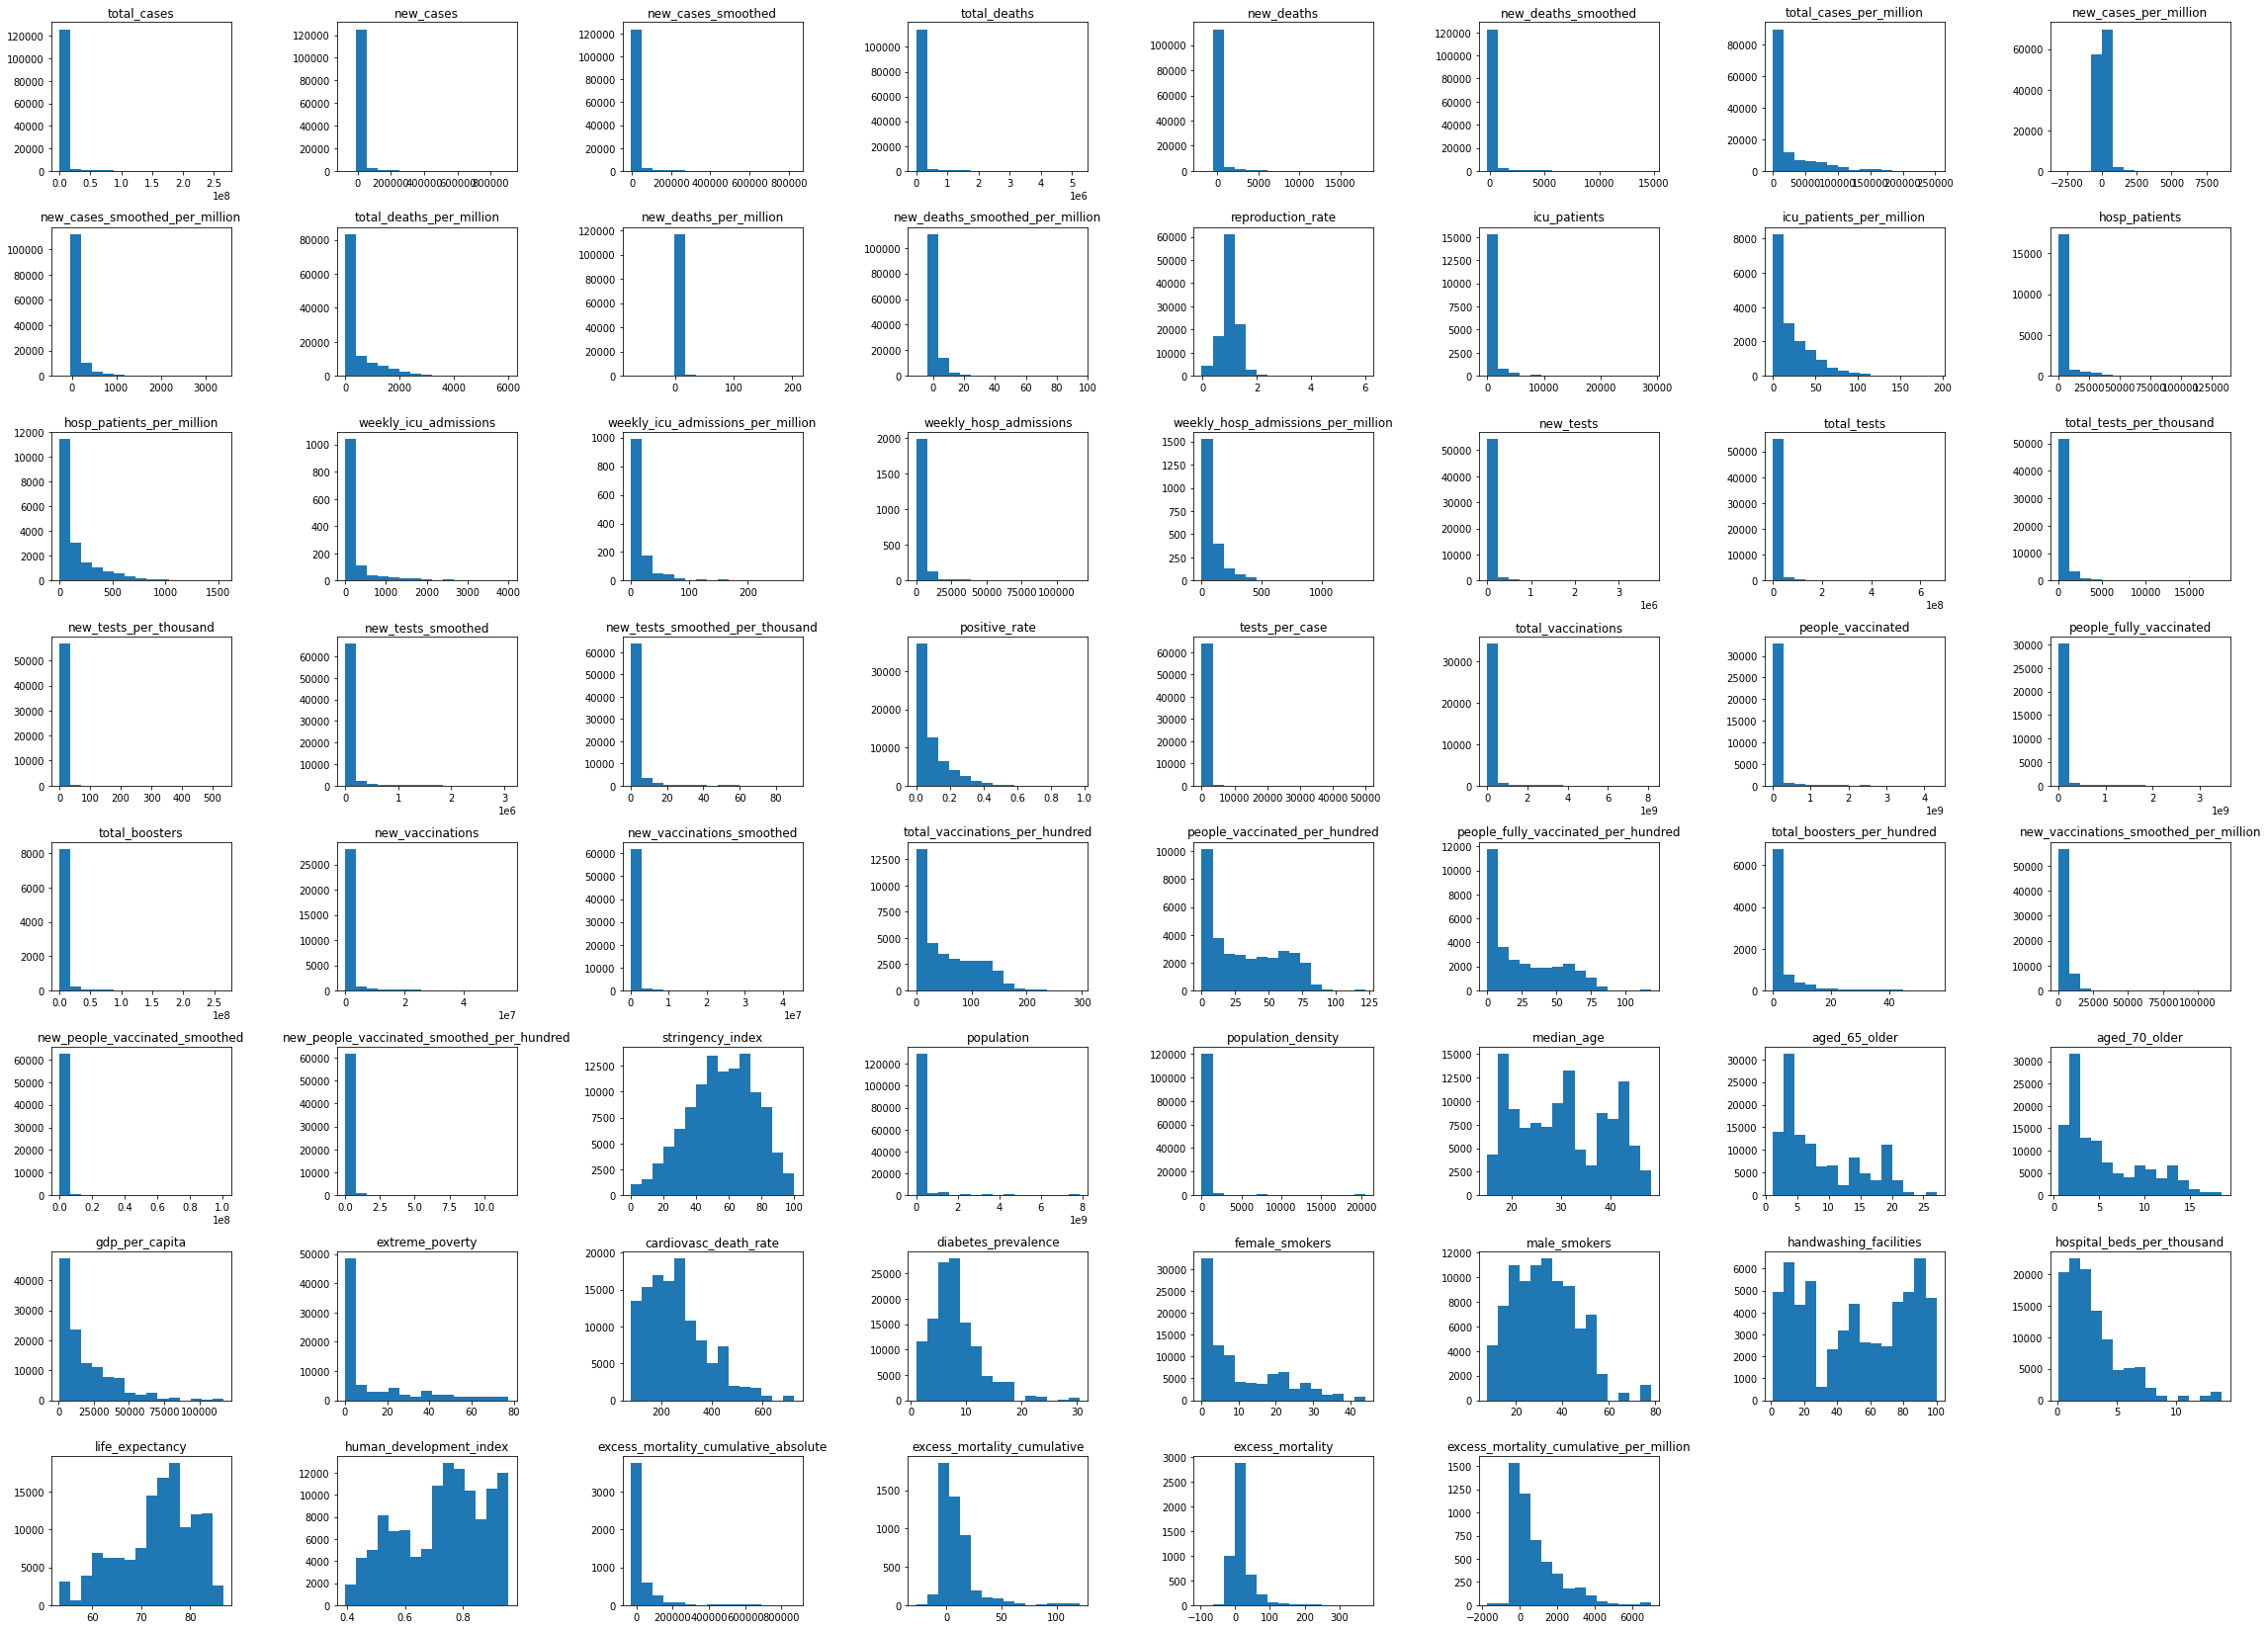

In [ ]:
# Plotando os histogramas das variáveis

df.hist(bins=15, figsize=(32,23), grid=False)
plt.tight_layout()

In [ ]:
df.loc[df.date == data_limite].sort_values(by='total_cases', ascending=False).head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
135774,OWID_WRL,NaN,World,2021-12-03,264932878.0,718142.0,610380.857,5243348.0,8666.0,7690.000,33642.417,91.193,77.509,665.825,1.100,0.977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.143543e+09,4.320983e+09,3.474709e+09,264463244.0,22235804.0,34412014.0,103.41,54.87,44.12,3.36,4370.0,8820358.0,0.112,NaN,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
53758,OWID_HIC,NaN,High income,2021-12-03,116716471.0,540405.0,448405.143,1845528.0,4110.0,3553.286,96068.456,444.803,369.079,1519.040,3.383,2.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.841830e+09,9.034572e+08,8.277173e+08,142873378.0,3361047.0,5209600.0,151.60,74.36,68.13,11.76,4288.0,925719.0,0.076,NaN,1.214930e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131241,OWID_UMC,NaN,Upper middle income,2021-12-03,82938711.0,125577.0,113833.857,2200737.0,2892.0,2625.857,32995.031,49.958,45.286,875.507,1.151,1.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.812024e+09,1.905818e+09,1.676857e+09,116364459.0,11637654.0,13019091.0,151.65,75.82,66.71,4.63,5179.0,2019284.0,0.080,NaN,2.513673e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7080,OWID_ASI,NaN,Asia,2021-12-03,82367067.0,85258.0,83516.000,1223118.0,1508.0,1376.429,17605.650,18.224,17.851,261.437,0.322,0.294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.524980e+09,2.958570e+09,2.324263e+09,102043918.0,15967706.0,25068461.0,118.09,63.24,49.68,2.18,5358.0,5467341.0,0.117,NaN,4.678445e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41125,OWID_EUR,NaN,Europe,2021-12-03,75980627.0,418190.0,371667.000,1433065.0,4289.0,3903.000,101447.773,558.359,496.242,1913.399,5.727,5.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.676880e+08,4.721901e+08,4.381754e+08,80866896.0,2901118.0,3842972.0,129.20,63.05,58.50,10.80,5131.0,937044.0,0.125,NaN,7.489630e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73902,OWID_LMC,NaN,Lower middle income,2021-12-03,63892705.0,50893.0,47210.143,1159635.0,1636.0,1478.286,19183.239,15.280,14.174,348.171,0.491,0.444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.433180e+09,1.470672e+09,9.493550e+08,5225407.0,7237103.0,15663296.0,73.05,44.16,28.50,0.16,4703.0,5494835.0,0.165,NaN,3.330653e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91732,OWID_NAM,NaN,North A

A saída acima apresenta as 20 primeiras entradas do dataset, considerando a data limite. Como é fácil perceber, o dataset contém totais parciais, considerando os aspectos econômicos e geográficos.

## **Ordenando nosso dataset pelo total de mortes, até a data limite**

In [ ]:
df.loc[df.date == data_limite].sort_values(by='total_deaths', ascending=False).head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
135774,OWID_WRL,NaN,World,2021-12-03,264932878.0,718142.0,610380.857,5243348.0,8666.0,7690.000,33642.417,91.193,77.509,665.825,1.100,0.977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.143543e+09,4.320983e+09,3.474709e+09,264463244.0,22235804.0,34412014.0,103.41,54.87,44.12,3.36,4370.0,8820358.0,0.112,NaN,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
131241,OWID_UMC,NaN,Upper middle income,2021-12-03,82938711.0,125577.0,113833.857,2200737.0,2892.0,2625.857,32995.031,49.958,45.286,875.507,1.151,1.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.812024e+09,1.905818e+09,1.676857e+09,116364459.0,11637654.0,13019091.0,151.65,75.82,66.71,4.63,5179.0,2019284.0,0.080,NaN,2.513673e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53758,OWID_HIC,NaN,High income,2021-12-03,116716471.0,540405.0,448405.143,1845528.0,4110.0,3553.286,96068.456,444.803,369.079,1519.040,3.383,2.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.841830e+09,9.034572e+08,8.277173e+08,142873378.0,3361047.0,5209600.0,151.60,74.36,68.13,11.76,4288.0,925719.0,0.076,NaN,1.214930e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41125,OWID_EUR,NaN,Europe,2021-12-03,75980627.0,418190.0,371667.000,1433065.0,4289.0,3903.000,101447.773,558.359,496.242,1913.399,5.727,5.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.676880e+08,4.721901e+08,4.381754e+08,80866896.0,2901118.0,3842972.0,129.20,63.05,58.50,10.80,5131.0,937044.0,0.125,NaN,7.489630e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7080,OWID_ASI,NaN,Asia,2021-12-03,82367067.0,85258.0,83516.000,1223118.0,1508.0,1376.429,17605.650,18.224,17.851,261.437,0.322,0.294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.524980e+09,2.958570e+09,2.324263e+09,102043918.0,15967706.0,25068461.0,118.09,63.24,49.68,2.18,5358.0,5467341.0,0.117,NaN,4.678445e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114651,OWID_SAM,NaN,South America,2021-12-03,39007258.0,20903.0,18662.714,1182899.0,385.0,399.429,89824.634,48.135,42.976,2723.941,0.887,0.920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.990965e+08,3.208571e+08,2.576459e+08,32191478.0,2217128.0,2434132.0,137.96,73.89,59.33,7.41,5605.0,840192.0,0.193,NaN,4.342601e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91732,OWID_NAM,NaN,North Americ

Da mesma forma que a saída para os totais de casos, a saída acima apresenta as 20 primeiras entradas do dataset, considerando a data limite. 

## **Sobre as Variantes (Variants of Concern - VOC)**


Em virtude da característica de mutação inerente aos vírus, é preciso haver um controle dessas mutações. Desta forma, a OMS classificou as variantes do SARS-CoV-2 conforme o nível de preocupação que elas podem causar, principalmente por:


*   Causarem um aumento na transmissibilidade ou comprometerem as medidas de combate à propagação da doença
*   Apresentarem alteração no diagnóstico
*   Detrimento da capacidade do poder público em realizar um diagnóstico

Maiores informações podem ser obtidas no site da <a href="https://www.who.int/en/activities/tracking-SARS-CoV-2-variants/">OMS</a> e <a href="https://www.paho.org/pt/noticias/1-6-2021-oms-anuncia-nomenclaturas-simples-e-faceis-pronunciar-para-variantes-interesse-e">sobre as nomenclaturas</a>.

# **Análise Exploratória - Nível Mundial**

## **Remoção dos totais parciais do nosso dataset**

In [ ]:
# Removendo os totais de nosso dataset

df_nototals = df[~df['iso_code'].str.contains('OWID')]
df_nototals.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.205810e+05,120569.000000,119611.000000,109503.000000,109499.000000,119611.000000,120581.000000,120569.000000,119611.000000,109503.000000,109499.000000,119611.000000,107576.000000,16922.000000,16922.000000,19340.000000,19340.000000,1318.000000,1318.000000,2202.000000,2202.000000,5.720300e+04,5.745800e+04,57458.000000,57203.000000,6.952000e+04,69520.000000,64908.000000,64247.000000,3.177600e+04,3.018200e+04,2.738400e+04,6.082000e+03,2.584900e+04,5.954900e+04,31776.000000,30182.000000,27384.000000,6082.000000,59549.000000,5.845700e+04,58457.000000,111435.000000,1.279210e+05,123251.000000,117939.000000,116629.000000,117292.000000,118086.000000,78462.000000,118133.000000,122123.000000,91862.000000,90526.000000,59121.000000,107269.000000,127269.000000,118250.000000,4834.000000,4834.000000,4834.000000,4834.000000
mean,5.556746e+05,2191.042490,2191.557502,13610.772381,47.702920,43.452199,21048.041596,90.948387,90.626368,416.693171,1.595550,1.450746,0.995874,877.963125,22.502186,4020.874664,158.117419,240.437026,17.464152,3267.200272,87.956408,5.896175e+04,1.292036e+07,544.697378,2.628403,5.501446e+04,2.488212,0.087306,160.679784,3.084256e+07,1.260027e+07,8.904142e+06,1.218068e+06,2.735097e+05,1.348238e+05,56.768556,32.376060,26.247851,4.450702,3426.619859,6.257649e+04,0.177143,55.943724,4.060352e+07,405.352536,30.491632,8.741031,5.530208,19305.542022,13.655627,260.278207,8.046767,10.620394,32.738949,50.737295,3.030515,73.266758,0.726020,33497.217873,9.146618,16.233517,828.110608
std,2.675532e+06,11213.642178,10892.067964,53685.978044,204.458001,185.069495,35079.263664,216.375450,182.528055,690.304121,4.238369,3.180006,0.340157,2767.836859,24.618237,11095.199439,212.371056,505.678793,32.648434,10426.390170,140.255348,1.992710e+05,5.262256e+07,1327.771267,7.205819,1.775801e+05,5.882775,0.100097,835.124866,1.621655e+08,4.989339e+07,3.392463e+07,3.693625e+06,1.271753e+06,8.277192e+05,53.162329,27.010467,25.045568,8.528388,4188.861902,3.302436e+05,0.281273,20.633529,1.504198e+08,1887.033568,9.141282,6.198039,4.226086,20181.667241,20.127228,120.206681,4.333694,10.534960,13.566150,31.985428,2.462083,7.549300,0.150452,92903.785682,17.393387,31.722365,1239.117522
min,1.000000e+00,-74347.000000,-6223.000000,1.000000,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,-75.911000,-10.844000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000

## **Quais são os países com mais casos de COVID-19 até a data limite?**

Para a visualização de dados categóricos, é interessante utilizar barras horizontais. Desta forma, fica evidente a diferença entre os dados.

Por se tratar de uma ANÁLISE EXPLORATÓRIA, evitamos a personalização extrema de gráficos, de forma a atingir o objetivo com o mínimo esforço possível. Em uma ANÁLISE EXPLANATÓRIA, recursos visuais serão utilizados de forma a levar o leitor a um estado de compreensão com a menor carga cognitiva possível.

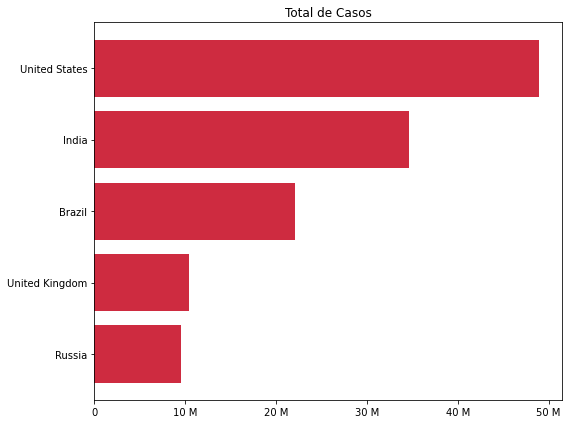

In [ ]:
formatter = EngFormatter()
fig, ax = plt.subplots(figsize=(8,6))
top5_total_cases = df_nototals.loc[df_nototals.date == data_limite, ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[0:5]
top5_total_cases = top5_total_cases.sort_values(by='total_cases', ascending=True)
ax.xaxis.set_major_formatter(formatter)
ax.barh('location', 'total_cases', data=top5_total_cases, color="#CE2B40")
ax.set_title('Total de Casos')
plt.tight_layout()

## **Quais são os países com mais mortos por COVID-19 até a data limite?**

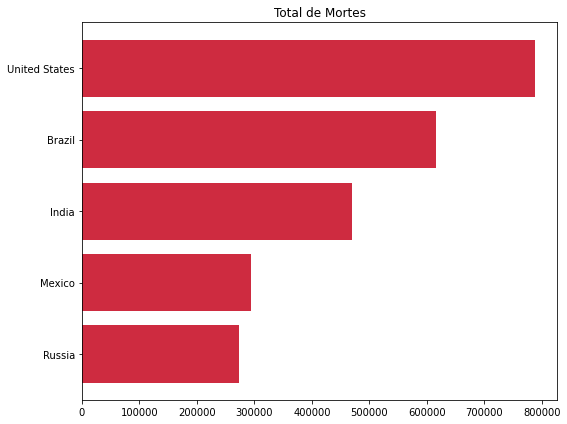

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
top5_total_deaths = df_nototals.loc[df_nototals.date == data_limite, ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:5]
top5_total_deaths = top5_total_deaths.sort_values(by='total_deaths', ascending=True)
ax.barh('location', 'total_deaths', data=top5_total_deaths, color=vermelho_COVID)
ax.set_title('Total de Mortes')

plt.tight_layout()

## **Evolução do Total de Casos por COVID-19 no Mundo**

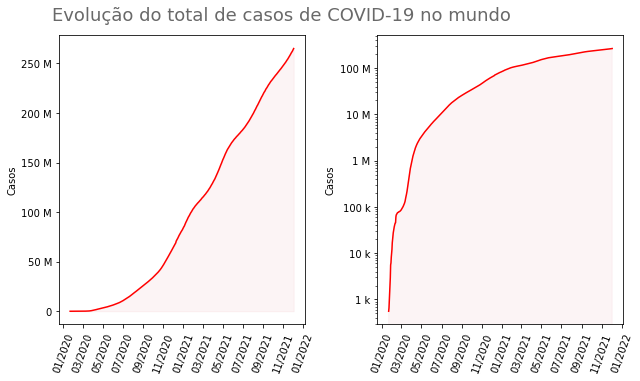

In [ ]:
from IPython.core.pylabtools import figsize
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,5))

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'total_cases']

myFmt = mdates.DateFormatter("%m/%Y")

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylabel('Casos')
    ax.fill_between(x, y, alpha=0.05, color="#CE2B40")
    
ax1.plot(x, y, color='red')
ax1.yaxis.set_major_formatter(EngFormatter())

ax2.plot(x, y, color='red')
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(EngFormatter())

plt.suptitle('Evolução do total de casos de COVID-19 no mundo', color='dimgray', fontsize=18, x=0.44, y=1.05)

plt.tight_layout()

## **Qual a relação entre PIB per Capita e Mortos, Expectativa de Vida e Mortos?**

Lembrando que correlação não implica em causalidade.

In [ ]:
import plotly.express as px

df_countries_last_date = df[~df['iso_code'].str.startswith('OWID')].loc[df['date'] == data_limite].sort_values(by="total_deaths", ascending=False)

fig = px.scatter(df_countries_last_date.dropna(how='all', subset=['gdp_per_capita']), x="life_expectancy", y="total_cases_per_million", size='gdp_per_capita', color='continent', hover_name='location')
fig.show()

In [ ]:
fig = px.scatter(df_countries_last_date.dropna(how='all', subset=['gdp_per_capita']), x="life_expectancy", y="total_deaths_per_million", size='gdp_per_capita', color='continent', hover_name='location')
fig.show()

## **Evolução do Total de Mortes de COVID-19 no Mundo**

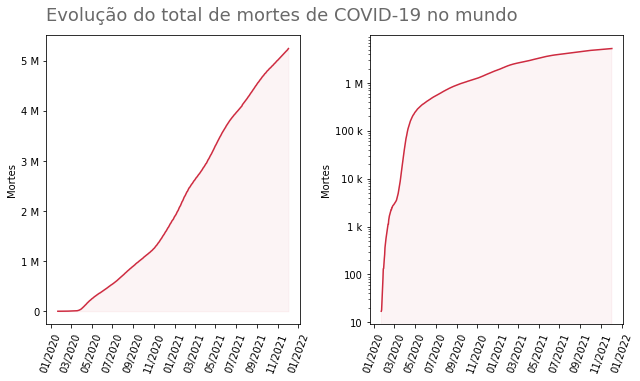

In [ ]:
from IPython.core.pylabtools import figsize
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,5))

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'total_deaths']

myFmt = mdates.DateFormatter("%m/%Y")

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylabel('Mortes')
    ax.fill_between(x, y, alpha=0.05, color=vermelho_COVID)
    
ax1.plot(x, y, color=vermelho_COVID)
ax1.yaxis.set_major_formatter(EngFormatter())

ax2.plot(x, y, color=vermelho_COVID)
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(EngFormatter())

plt.suptitle('Evolução do total de mortes de COVID-19 no mundo', color='dimgray', fontsize=18, x=0.44, y=1.05)

plt.tight_layout()

Pode-se observar que o nosso dataset original contempla 9 entradas que são resultado do somatório de acordo com as localizações ou renda. Estes valores são capazes de distorcer profundamente nossa análise, e, por isso, as eliminaremos.

Adicionalmente, são entradas válidas para análises isoladas, mas não no dataset como um todo. Como pode se observar no gráfico acima, o agrupamento `'World'` foi de grande valor para entendermos o comportamento da COVID-19 no mundo.

In [ ]:
df_nototals.sort_values(by='total_deaths', ascending=False).head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130559,USA,North America,United States,2021-12-03,48990127.0,157899.0,116229.143,787695.0,1795.0,1606.000,147155.028,474.292,349.126,2366.054,5.392,4.824,NaN,13657.0,41.022,53086.0,159.458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466348132.0,234743864.0,196693864.0,43958302.0,3.0,783969.0,140.46,70.70,59.24,13.24,2361.0,187936.0,0.057,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130558,USA,North America,United States,2021-12-02,48832228.0,140875.0,100971.857,785900.0,3800.0,1386.714,146680.736,423.156,303.296,2360.662,11.414,4.165,NaN,13678.0,41.086,53169.0,159.707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466348129.0,234743862.0,196693863.0,43958302.0,147605.0,940439.0,140.46,70.70,59.24,13.24,2833.0,230658.0,0.069,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130557,USA,North America,United States,2021-12-01,48691353.0,135379.0,85504.286,782100.0,1960.0,896.429,146257.580,406.647,256.835,2349.248,5.887,2.693,1.24,13649.0,40.998,53284.0,160.053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466200524.0,234700366.0,196671131.0,43877281.0,1163206.0,922429.0,140.42,70.69,59.24,13.22,2778.0,225439.0,0.068,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130556,USA,North America,United States,2021-11-30,48555974.0,117098.0,82074.429,780140.0,1435.0,854.286,145850.933,351.735,246.533,2343.360,4.310,2.566,1.24,13535.0,40.656,52581.0,157.941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,465037318.0,234428706.0,196450249.0,43198447.0,1386547.0,936016.0,140.07,70.61,59.17,13.01,2819.0,241290.0,0.073,50.46,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130555,USA,North America,United States,2021-11-29,48438876.0,196973.0,78547.714,778705.0,1962.0,835.286,145499.197,591.661,235.939,2339.050,5.893,2.509,1.22,13356.0,40.118,51744.0,155.427,NaN,NaN,NaN,NaN,341749.0,665107373.0,1997.829,1.027,841514.0,2.528,0.093,10.7,tests performed,463650771.0,234115595.0,196175491.0,42388305.0,1450645.0,970522.0,139.65,70.51,59.09,12.77,2923.0,262882.0,0.079,50.46,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [ ]:
df_nototals.loc[df_nototals.date == data_limite].sort_values(by='total_deaths', ascending=False).head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130559,USA,North America,United States,2021-12-03,48990127.0,157899.0,116229.143,787695.0,1795.0,1606.000,147155.028,474.292,349.126,2366.054,5.392,4.824,NaN,13657.0,41.022,53086.0,159.458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.663481e+08,234743864.0,196693864.0,43958302.0,3.0,783969.0,140.46,70.70,59.24,13.24,2361.0,187936.0,0.057,NaN,3.329151e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
17774,BRA,South America,Brazil,2021-12-03,22129409.0,10627.0,8825.571,615400.0,221.0,206.143,103411.623,49.660,41.242,2875.789,1.033,0.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.136650e+08,164457496.0,136438552.0,17665501.0,1714641.0,989021.0,146.58,76.85,63.76,8.26,4622.0,130099.0,0.061,NaN,2.139934e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
57034,IND,Asia,India,2021-12-03,34624360.0,8603.0,8658.714,470530.0,415.0,371.000,24848.669,6.174,6.214,337.683,0.298,0.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1157156.0,644668082.0,462.655,0.83,1080296.0,0.775,NaN,NaN,samples tested,1.261728e+09,796283823.0,465444205.0,NaN,5861617.0,7281421.0,90.55,57.15,33.40,NaN,5226.0,2247545.0,0.161,NaN,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
81024,MEX,North America,Mexico,2021-12-03,3897452.0,6234.0,2516.571,294904.0,476.0,184.286,29920.049,47.857,19.319,2263.926,3.654,1.415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.302622e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
102678,RUS,Europe,Russia,2021-12-03,9565909.0,32316.0,32619.143,273463.0,1184.0,1189.857,65559.430,221.476,223.553,1874.164,8.114,8.155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289898e+08,67472564.0,57873182.0,4671320.0,543523.0,655686.0,88.40,46.24,39.66,3.20,4494.0,231586.0,0.159,NaN,1.459120e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN


In [ ]:
df_nototals.loc[df_nototals.date == data_limite].sort_values(by='total_cases', ascending=False).head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130559,USA,North America,United States,2021-12-03,48990127.0,157899.0,116229.143,787695.0,1795.0,1606.000,147155.028,474.292,349.126,2366.054,5.392,4.824,NaN,13657.0,41.022,53086.0,159.458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.663481e+08,234743864.0,196693864.0,43958302.0,3.0,783969.0,140.46,70.70,59.24,13.24,2361.0,187936.0,0.057,NaN,3.329151e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
57034,IND,Asia,India,2021-12-03,34624360.0,8603.0,8658.714,470530.0,415.0,371.000,24848.669,6.174,6.214,337.683,0.298,0.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1157156.0,644668082.0,462.655,0.83,1080296.0,0.775,NaN,NaN,samples tested,1.261728e+09,796283823.0,465444205.0,NaN,5861617.0,7281421.0,90.55,57.15,33.40,NaN,5226.0,2247545.0,0.161,NaN,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
17774,BRA,South America,Brazil,2021-12-03,22129409.0,10627.0,8825.571,615400.0,221.0,206.143,103411.623,49.660,41.242,2875.789,1.033,0.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.136650e+08,164457496.0,136438552.0,17665501.0,1714641.0,989021.0,146.58,76.85,63.76,8.26,4622.0,130099.0,0.061,NaN,2.139934e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
129877,GBR,Europe,United Kingdom,2021-12-03,10438381.0,51181.0,44633.714,145874.0,146.0,119.714,153039.476,750.376,654.385,2138.692,2.141,1.755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.820711e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
102678,RUS,Europe,Russia,2021-12-03,9565909.0,32316.0,32619.143,273463.0,1184.0,1189.857,65559.430,221.476,223.553,1874.164,8.114,8.155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289898e+08,67472564.0,57873182.0,4671320.0,543523.0,655686.0,88.40,46.24,39.66,3.20,4494.0,231586.0,0.159,NaN,1.459120e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN


# **Análise Exploratória - Nível Brasil**



In [ ]:
df_brasil = df_nototals.loc[df_nototals.location == 'Brazil'].copy()
df_brasil.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,6.470000e+02,646.000000,642.000000,627.000000,627.000000,642.000000,647.000000,646.000000,642.000000,627.000000,627.000000,642.000000,628.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.650000e+02,3.510000e+02,351.000000,265.000000,578.000000,578.000000,0.0,0.0,3.210000e+02,3.210000e+02,3.020000e+02,9.300000e+01,3.200000e+02,3.200000e+02,321.000000,321.000000,302.000000,93.000000,320.00000,3.200000e+02,320.000000,629.000000,647.0,6.470000e+02,647.0,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,0.0,6.470000e+02,6.470000e+02,6.470000e+02,21.000000,21.000000,21.000000,21.000000
mean,1.000640e+07,34023.688854,34187.870727,285857.891547,981.499203,957.513143,46760.324662,158.994077,159.761310,1335.825499,4.586571,4.474491,1.094952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.396434e+05,3.324080e+07,155.335607,0.652558,112609.705882,0.526232,NaN,NaN,1.226197e+08,7.900451e+07,4.668952e+07,6.278694e+06,9.802029e+05,9.683412e+05,57.300779,36.919128,21.818146,2.933763,4525.12500,5.126955e+05,0.239569,63.606677,213993441.0,2.504000e+01,33.5,8.552000e+00,5.060000e+00,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01,302213.419048,18.194286,28.359524,1412.255524
std,7.840687e+06,25191.693889,21069.031533,212614.957915,796.975427,692.417383,36639.849068,117.721812,98.456432,993.558293,3.724305,3.235700,0.267784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.890025e+05,1.750029e+07,81.779514,1.817848,117796.434666,0.550502,NaN,NaN,1.019470e+08,5.984738e+07,4.246715e+07,5.737024e+06,6.491292e+05,4.858868e+05,47.640088,27.966862,19.845259,2.681220,2270.57681,3.353089e+05,0.156702,13.189654,0.0,4.159891e-13,0.0,4.799874e-14,4.533215e-14,2.057048e-10,4.133225e-14,1.109304e-12,3.911009e-14,9.599748e-14,2.097723e-13,NaN,2.577710e-14,6.542051e-13,9.999738e-15,241568.546123,8.357079,21.438503,1128.859581
min,1.000000e+00,-573.000000,0.286000,1.000000,0.000000,0.000000,0.005000,-2.678000,0.001000,0.005000,0.000000,0.000000,0.880000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.410000e+02,1.796980e+05,0.840000,0.001000,508.000000,0.002000,NaN,NaN,1.120000e+02,1.120000e+02,1.962000e+03,2.820000e+02,9.970000e+02,9.970000e+02,0.000000,0.000000,0.000000,0.000000,5.00000,9.970000e+02,0.000000,5.560000,213993441.0,2.504000e+01,33.5,8.552000e+00,5.060000e+00,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01,7049.600000,3.310000,5.250000,32.943066
25%,2.885642e+06,13414.250000,16550.642750,112831.000000,427.500000,484.500000,13484.724000,62.685250,77.341750,527.264000,

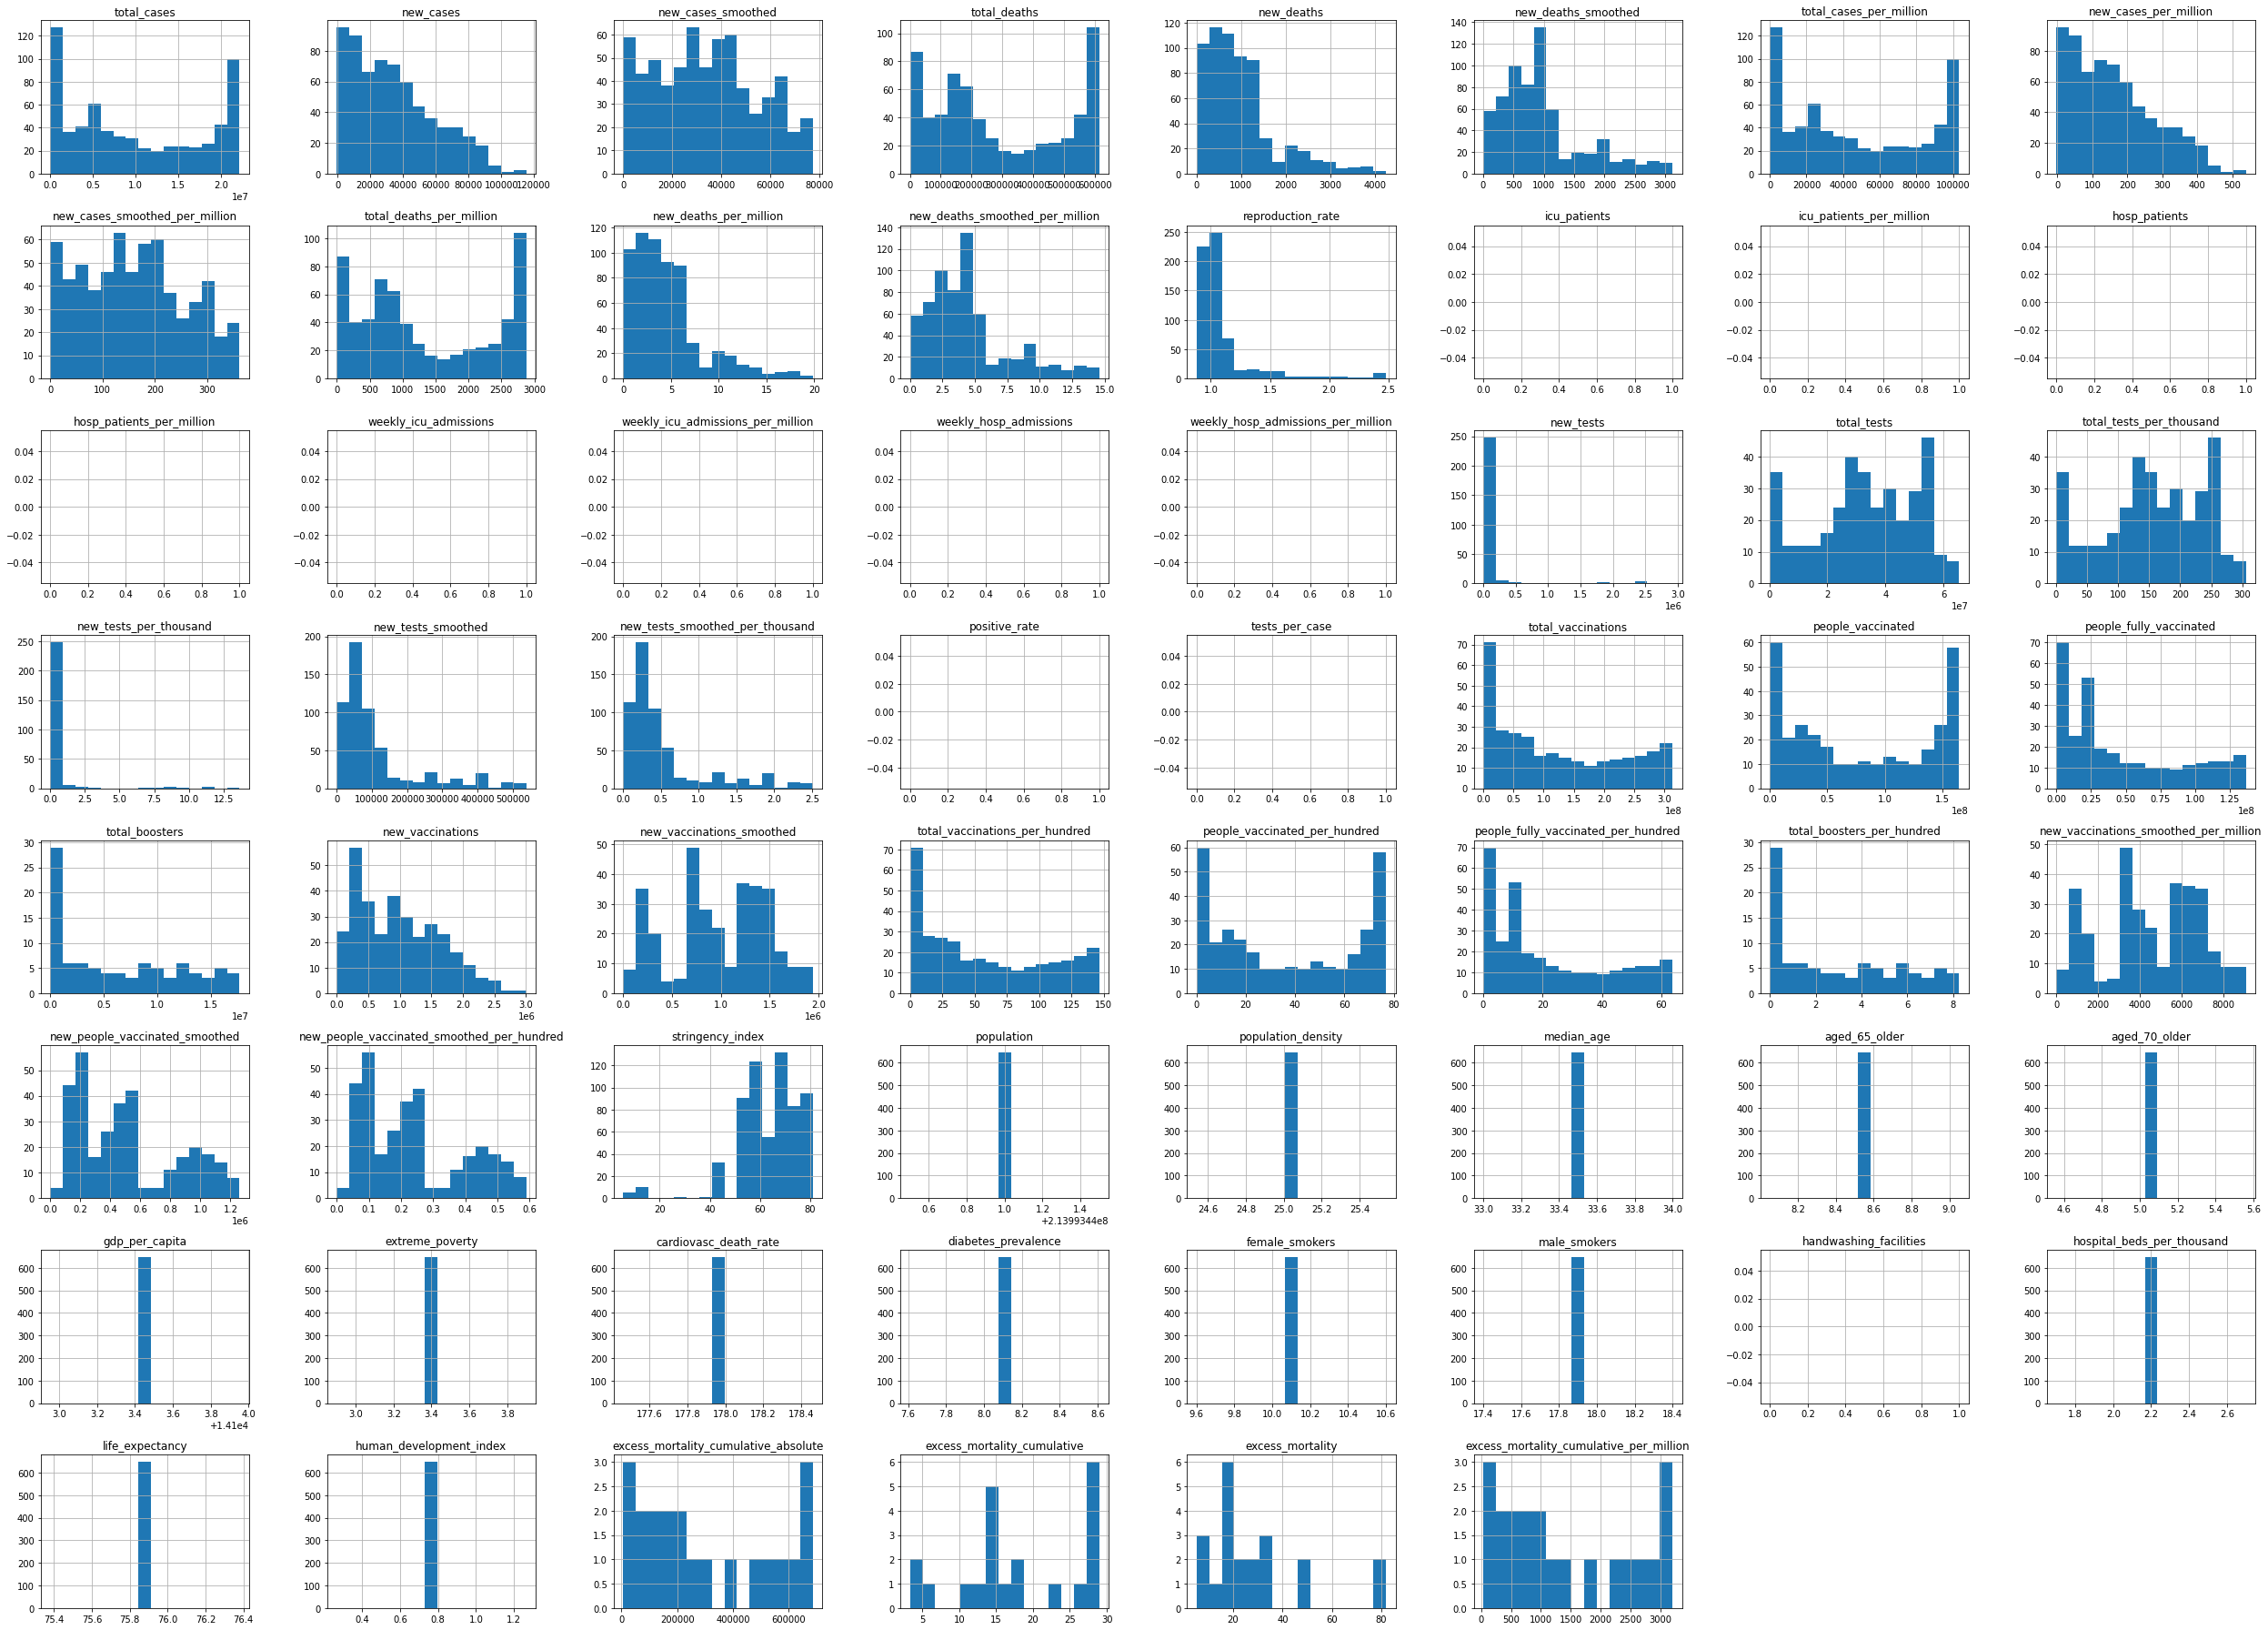

In [ ]:
df_brasil.hist(bins=15, figsize=(35,25))

plt.tight_layout()

## **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados do Brasil possui?**

In [ ]:
# Visualizando o total de entradas e variáveis de nosso dataset
print("Quantidade de Entradas: {}".format(df_brasil.shape[0]))
print("Quantidade de Variáveis: {}\n".format(df_brasil.shape[1]))

Quantidade de Entradas: 647
Quantidade de Variáveis: 67



## **Evolução do Total de Casos por COVID-19 no Brasil**

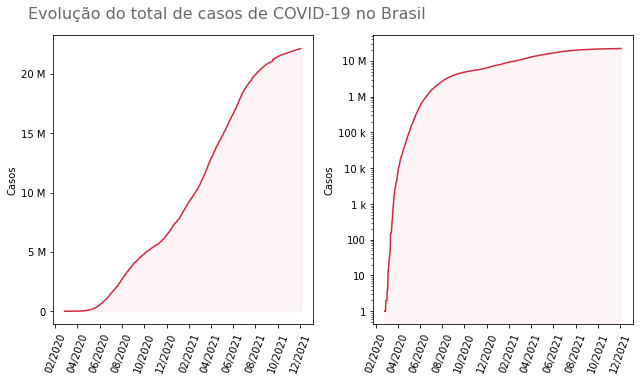

In [ ]:
from IPython.core.pylabtools import figsize
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,5))

x = df.loc[df['location'] == 'Brazil', 'date']
y = df.loc[df['location'] == 'Brazil', 'total_cases']

myFmt = mdates.DateFormatter("%m/%Y")

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylabel('Casos')
    ax.fill_between(x, y, alpha=0.05, color=vermelho_COVID)
    
ax1.plot(x, y, color=vermelho_COVID)
ax1.yaxis.set_major_formatter(EngFormatter())

ax2.plot(x, y, color=vermelho_COVID)
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(EngFormatter())

plt.suptitle('Evolução do total de casos de COVID-19 no Brasil\n', x=0.355, y=1.05, color='dimgray', fontsize=16)

plt.tight_layout()

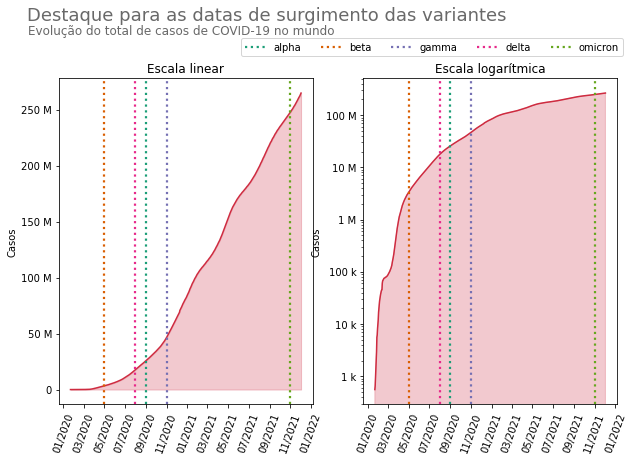

In [ ]:
variants = {
    'alpha': '2020-09-01',
    'beta': '2020-05-01',
    'gamma': '2020-11-01',
    'delta': '2020-08-01',
    'omicron': '2021-11-01'
}

variants = {key: datetime.fromisoformat(value) for (key, value) in variants.items()}

colors = plt.cm.Dark2.colors

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'total_cases']

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylabel('Casos')
    
ax1.plot(x, y, color=vermelho_COVID)
ax1.fill_between(x, y, alpha=0.25, color=vermelho_COVID)
ax1.yaxis.set_major_formatter(EngFormatter())
ax1.set_title('Escala linear')

ax2.plot(x, y, color=vermelho_COVID)
ax2.fill_between(x, y, alpha=0.25, color=vermelho_COVID)
ax2.set_yscale('log')
ax2.set_title('Escala logarítmica')
ax2.yaxis.set_major_formatter(EngFormatter())

for color, var in zip(colors, variants):
    for ax in (ax1, ax2):
        ax.axvline(x=variants[var], label=var, linestyle='dotted', 
                   linewidth=2.2, color=color)
        
fig.text(0.08, 0.965, 'Destaque para as datas de surgimento das variantes\n', fontsize=18, color='dimgray')
plt.suptitle('Evolução do total de casos de COVID-19 no mundo', color='dimgray', x=0.295, y=1.005)

handles, labels = ax.get_legend_handles_labels()

fig.legend(loc='upper center', bbox_to_anchor=(0.6, 0.99), ncol=5, handles=handles, labels=labels)
plt.show()

## **Evolução do Total de Mortes por COVID-19 no Brasil**

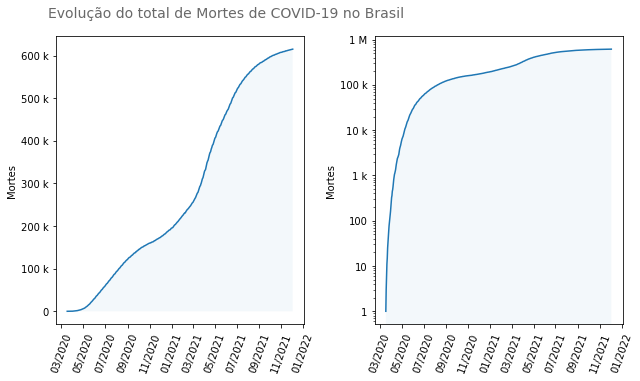

In [ ]:
from IPython.core.pylabtools import figsize
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,5))

x = df.loc[df['location'] == 'Brazil', 'date']
y = df.loc[df['location'] == 'Brazil', 'total_deaths']

myFmt = mdates.DateFormatter("%m/%Y")

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylabel('Mortes')
    ax.fill_between(x, y, alpha=0.05)
    
ax1.plot(x, y)
ax1.yaxis.set_major_formatter(EngFormatter())

ax2.plot(x, y)
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(EngFormatter())

plt.suptitle('Evolução do total de Mortes de COVID-19 no Brasil\n', x=0.355, y=1.05, color='dimgray', fontsize=14)

plt.tight_layout()

## **Definindo os dados como uma série temporal, através da alteração do índice para a coluna date**

In [ ]:
df_brasil.set_index('date', inplace=True)
df_brasil.head(10)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,BRA,South America,Brazil,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-02-27,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-02-28,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-02-29,BRA,South America,Brazil,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
2020-03-01,BRA,South America,Brazil,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-03-02,BRA,South America,Brazil,2.0,0.0,0.286,NaN,NaN,0.0,0.009,0.000,0.001,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-03-03,BRA,South America,Brazil,2.0,0.0,0.286,NaN,NaN,0.0,0.009,0.000,0.001,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-03-04,BRA,South America,Brazil,4.0,2.0,0.429,NaN,NaN,0.0,0.019,0.009,0.002,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,213993441.0,25.04,33.

## **Quando foi registrado o primeiro caso no Brasil?**

In [ ]:
df_brasil.loc[df_brasil.total_cases >= 1].index[0]

Timestamp('2020-02-26 00:00:00')

## **Quando foi registrada a primeira morte no Brasil?**

In [ ]:
df_brasil.loc[df_brasil.total_deaths >= 1].index[0]

Timestamp('2020-03-17 00:00:00')

## **Quantos dias se passaram desde o registro do primeiro caso até a primeira morte no Brasil?**

In [ ]:
df_brasil.loc[df_brasil.total_deaths >= 1].index[0] - df_brasil.loc[df_brasil.total_cases >= 1].index[0]

Timedelta('20 days 00:00:00')

## **Como está se comportando o Brasil quanto à Taxa Efetiva de Reprodução (R)?**

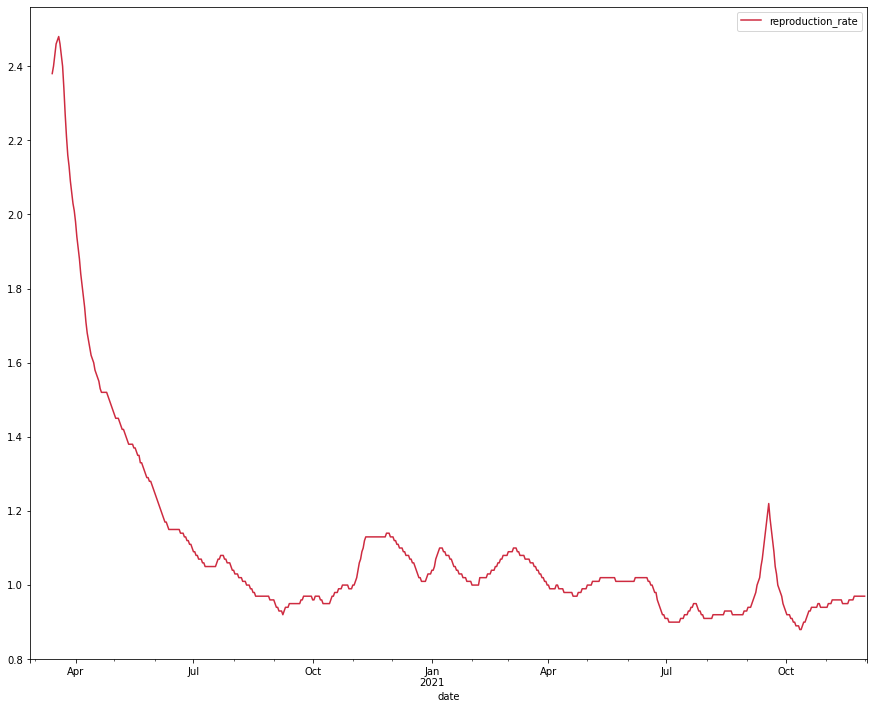

In [ ]:
fig, ax = plt.subplots(figsize=(15,12))

df_brasil.plot(kind='line', y='reproduction_rate', color=vermelho_COVID, ax=ax)

## **Como está se comportando o Brasil quanto ao número de novos casos?**

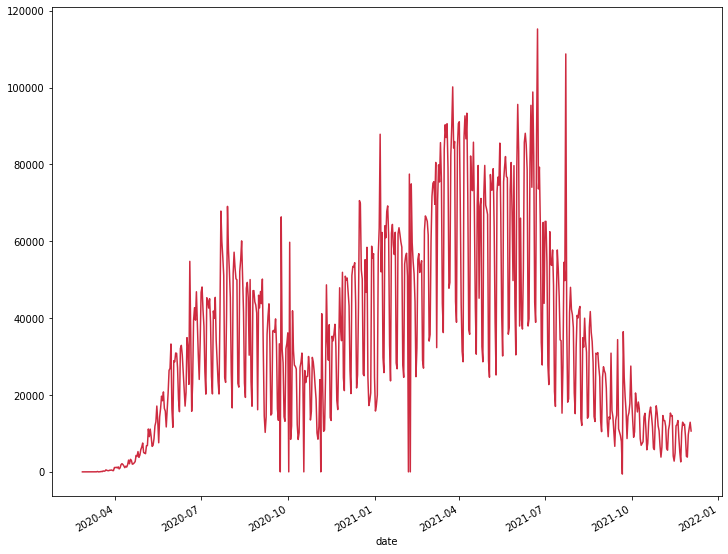

In [ ]:
df_brasil.new_cases.dropna(axis=0).plot(kind='line', figsize=(12,10), color=vermelho_COVID)

## **Como está se comportando o Brasil quanto ao número de novas mortes?**

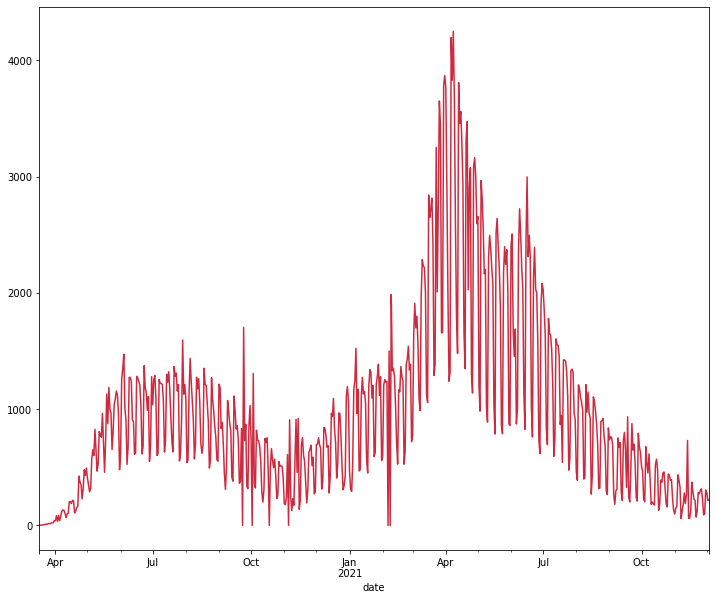

In [ ]:
df_brasil.new_deaths.dropna(axis=0).plot(kind='line', figsize=(12,10), color=vermelho_COVID)

## **Qual o total do número de vacinados no Brasil?**

In [ ]:
df_brasil.people_fully_vaccinated.tail(1)

date
2021-12-03    136438552.0
Name: people_fully_vaccinated, dtype: float64

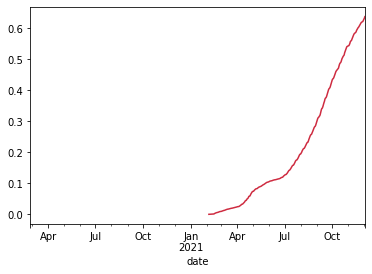

In [ ]:
(df_brasil.people_fully_vaccinated / df_brasil.population).plot(kind='line', color=vermelho_COVID);

In [ ]:
df_brasil.people_fully_vaccinated / df_brasil.population

date
2020-02-26         NaN
2020-02-27         NaN
2020-02-28         NaN
2020-02-29         NaN
2020-03-01         NaN
                ...   
2021-11-29    0.621653
2021-11-30    0.625773
2021-12-01    0.629163
2021-12-02    0.632377
2021-12-03    0.637583
Length: 647, dtype: float64

## **Preenchendo dados ausentes**

In [ ]:
df_brasil_fill = df_brasil.fillna(0)

In [ ]:
corr = df_nototals[['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
        'total_deaths', 'new_deaths', 'reproduction_rate', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 
       'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_people_vaccinated_smoothed_per_hundred', 
       'population_density', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand',
       'life_expectancy', 
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million']].corr()
display(corr)

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed_per_hundred,population_density,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.620807,0.930695,0.578905,-0.001298,0.777102,0.936408,0.058277,0.019748,0.324558,0.743378,0.631948,0.629208,0.287219,0.106433,0.131218,0.071646,0.021166,0.047598,-0.024524,0.111568,0.106706,0.094646,-0.091561,-0.091369,0.037059,0.077071,-0.065952,-0.001341,0.092168,0.805478,0.138276,0.047504,0.238679
new_cases,0.620807,1.000000,0.574011,0.802436,0.041736,0.718413,0.560190,0.020059,0.022669,0.121828,0.302212,0.247967,0.442985,0.144765,-0.009991,-0.007902,-0.031697,0.026959,0.031910,-0.022347,0.108534,0.104392,0.086878,-0.087817,-0.080061,0.030164,0.073526,-0.046875,0.008312,0.087753,0.503839,0.112340,0.158346,0.124755
total_deaths,0.930695,0.574011,1.000000,0.614795,-0.001155,0.694895,0.817985,0.027592,-0.001590,0.279941,0.641267,0.571372,0.554056,0.243934,0.086696,0.119555,0.051341,-0.019638,0.061335,-0.036258,0.122795,0.119960,0.084605,-0.126139,-0.122505,0.045812,0.083887,-0.075161,-0.006443,0.112333,0.928411,0.341182,0.131853,0.396588
new_deaths,0.578905,0.802436,0.614795,1.000000,0.007144,0.600771,0.452936,-0.031190,-0.015762,0.103328,0.274298,0.207566,0.381163,0.144110,-0.089800,-0.084330,-0.118803,-0.027350,0.038259,-0.032906,0.099256,0.095647,0.060061,-0.113732,-0.079747,0.043741,0.065879,-0.037741,0.004856,0.087749,0.520612,0.307493,0.413398,0.214107
reproduction_rate,-0.001298,0.041736,-0.001155,0.007144,1.000000,-0.029709,-0.036043,-0.019969,-0.012862,-0.001058,-0.033395,-0.007284,-0.019558,-0.011403,0.043117,0.033804,0.086630,-0.041471,0.002807,0.012439,0.167550,0.163077,0.092693,-0.180427,-0.057412,-0.015396,0.120198,0.006793,0.085676,0.164542,-0.073135,-0.122557,-0.068384,-0.137977
new_tests,0.777102,0.718413,0.694895,0.600771,-0.029709,1.000000,0.830769,0.153869,0.208292,0.614445,0.612694,0.585173,0.509966,0.600061,0.084983,0.090627,0.034232,0.039440,0.043855,0.006182,0.100901,0.097561,0.114345,-0.053552,-0.048335,0.084633,0.072424,-0.045255,-0.019576,0.069848,0.475046,0.033264,-0.012966,0.123624
total_tests,0.936408,0.560190,0.817985,0.452936,-0.036043,0.830769,1.000000,0.177102,0.101024,0.825344,0.796777,0.836918,0.667586,0.646408,0.149999,0.156830,0.109428,0.071595,0.012678,-0.001236,0.070773,0.066547,0.099357,-0.042980,-0.028967,0.092697,0.045710,-0.058039,-0.032649,0.046977,0.714456,0.047136,-0.015015,0.170642
total_tests_per_thousand,0.058277,0.020059,0.027592,-0.031190,-0.019969,0.153869,0.177102,1.000000,0.715937,-0.030695,-0.044809,-0.022409,-0.010972,-0.089742,0.455733,0.418035,0.417978,0.121833,0.027823,0.077237,0.176976,0.177303,0.315066,-0.193831,-0.115539,0.069262,0.209952,0.087941,0.092743,0.251973,-0.019404,-0.052333,-0.069535,0.094027
new_tests_per_thousand,0.019748,0.022669,-0.001590,-0.015762,-0.012862,0.208292,0.101024,0.715937,1.000000,-0.048569,-0.053286,-0.054710,-0.049806,-0.067337,0.189560,0.163394,0.155339,0.043848,0.077356,0.046552,0.168573,0.171194,0.251868,-0.157253,-0.101057,0.053548,0.204065,0.120366,0.106026,0.222342,-0.048198,-0.049078,-0.016128,0.024557
total_vaccinations,0.324558,0.121828,0.279941,0.103328,-0.001058,0.614445,0.825344,-0.030695,-0.048569,1.000000,0.988779,0.970221,0.698839,0.683232,0.170805,0.189906,0.125293,0.018932,0.011244,-0.024992,-0.004943,-0.020447,-0.038238,-0.029239,0.001875,0.065390,-0.104586,0.056607,-0.004265,0.001020,0.719430,0.030834

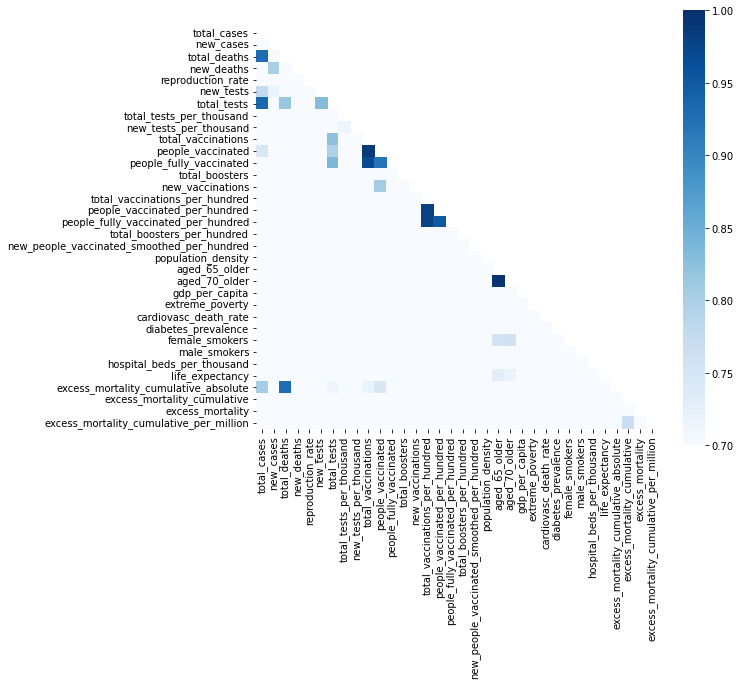

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(9,8))
ax = sns.heatmap(corr, vmin=0.70, vmax=1.0, mask=mask, cmap='Blues', fmt='.2f', square=True, linecolor='white');

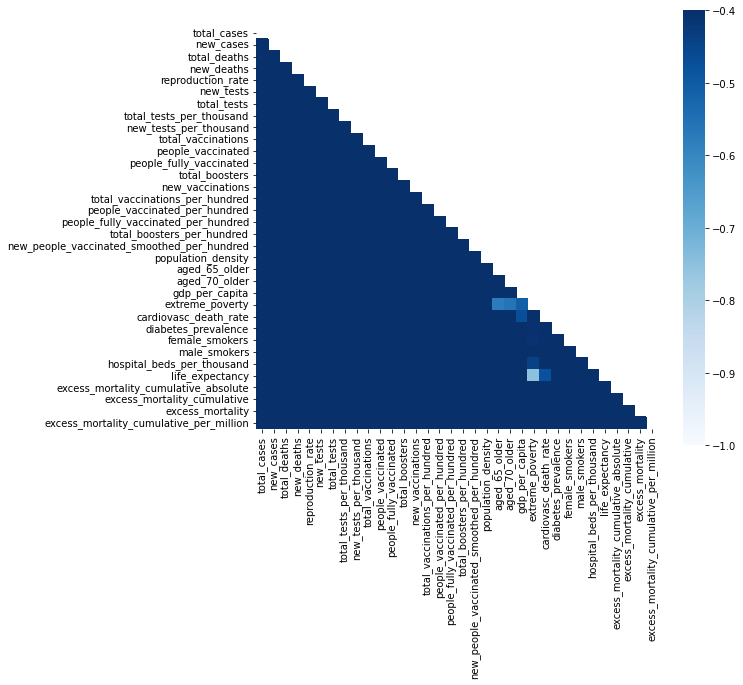

In [ ]:
fig, ax = plt.subplots(figsize=(9,8))
ax = sns.heatmap(corr, vmin=-0.40, vmax=-1.0, mask=mask, cmap='Blues', fmt='.2f', square=True, linecolor='white');

# **Conclusão**

Este projeto teve por objetivo apresentar um panorama à nível Brasil da COVID-19. Aspectos como total de casos, mortes, vacinação, e taxa de reprodução foram abordados. 

Principais conclusões obtidas por meio deste Projeto:

*   Passaram-se 20 dias desde o registro do primeiro caso de COVID-19 no Brasil até o registro da primeira morte
*   Os dados que foram utilizidos são de qualidade, há uma pequena ausência de dados, que não comprometeu a capacidade de analisar 
*   A Taxa Efetiva de Reprodução teve seu ápice em meados de Março de 2020, tendo caído progressivamente até os dias atuais.
*   O Brasil conta com 63.75% da população completamente imunizada
*   O número de novas mortes atingiu seu ápice em meados de Abril de 2021 e atualmente encontra-se em queda franca, desde o início das vacinações.